In [52]:
import sys
sys.path.insert(0, "../../../pymc")

import pymc as pm
import numpy as np

Sequential sampling (1 chains in 1 job)
Metropolis: [disc-unif]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 0 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


array([[<AxesSubplot:title={'center':'disc-unif'}>,
        <AxesSubplot:title={'center':'disc-unif'}>]], dtype=object)

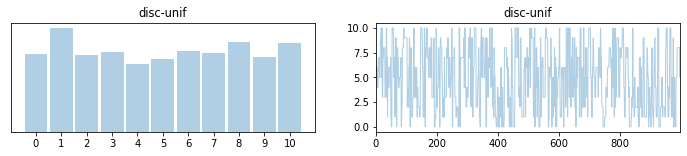

In [75]:
with pm.Model():
    disc_unif = pm.DiscreteUniform(name="disc-unif", lower=0, upper=10)
    trace = pm.sample(chains=1)
    
pm.plot_trace(trace)

In [77]:
with pm.Model():
    weights = [
        0.5, 
        0.5,
    ]
    components = [
        pm.DiscreteUniform.dist(lower=-25, upper=-20), 
        pm.DiscreteUniform.dist(lower=20, upper=25),
    ]
    mix = pm.Mixture("mix", weights, components, initval=-20)
    
    prior = pm.sample_prior_predictive()
    trace = pm.sample(chains=1)

Sequential sampling (1 chains in 1 job)
Metropolis: [mix]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 0 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


In [80]:
with pm.Model():
    weights = [
        0.5, 
        0.5,
    ]
    components = [
        pm.Normal.dist(mu=0., sigma=3.), 
        pm.DiscreteUniform.dist(lower=0, upper=5),
    ]
    mix = pm.Mixture("mix", weights, components, initval=0, observed=[])
    
    prior = pm.sample_prior_predictive()
    trace = pm.sample(chains=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [mix]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 2 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [p]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 1 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


array([[<AxesSubplot:title={'center':'p'}>,
        <AxesSubplot:title={'center':'p'}>]], dtype=object)

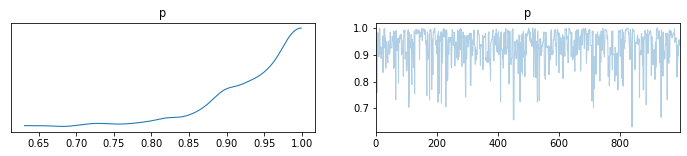

In [84]:
with pm.Model():
    p = pm.Beta(name="p", alpha=3., beta=1.)
    y = pm.Bernoulli(name="y", p=p, observed=[1]*10)
    
    trace = pm.sample(chains=1)
    
pm.plot_trace(trace)